<a href="https://colab.research.google.com/github/Tonniah/TW/blob/main/TEXT_PREPROCESSING_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Load essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from collections import Counter

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')

# Set visual settings
sns.set(style="whitegrid")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Load the dataset

In [3]:
dataset = pd.read_csv('HateSpeech_Kenya.csv')


print(dataset.head())
print(dataset.info())


   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hate_speech         48076 non-null  int64 
 1   offensive_language  48076 non-null  int64 
 2   neither             48076 non-null  int6

Initial visualizations

Generate wordclouds, bar charts, and other visualizations for the original dataset.


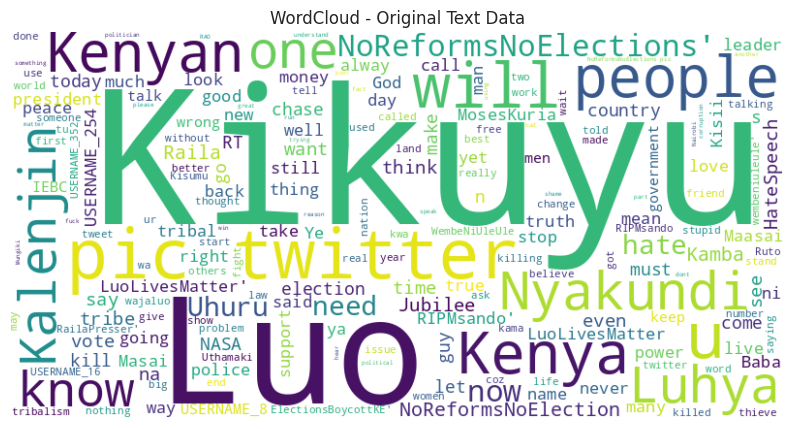

<ipython-input-4-6fdc775d8bee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


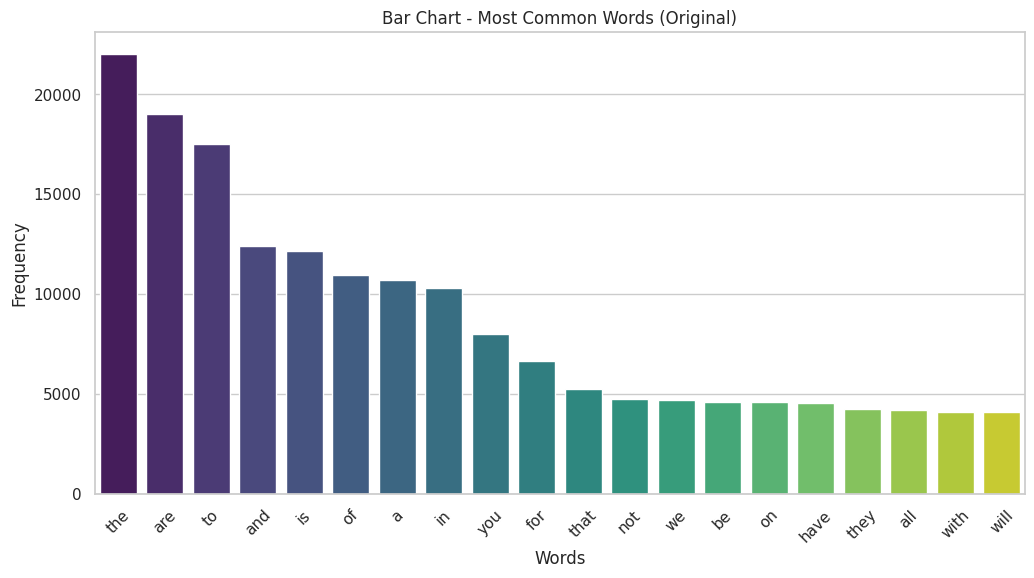

In [4]:
# Combine all text for visualizations
text_data = " ".join(dataset['Tweet'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Original Text Data")
plt.show()

# Generate Bar Chart of most common words
word_list = text_data.split()
word_freq = Counter(word_list)
most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.title("Bar Chart - Most Common Words (Original)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


Preprocessing the text

Perform tokenization, stopword removal, stemming, lemmatization, chunking, and POS tagging.




In [7]:
# Initialize preprocessors
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for preprocessing
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Stemming
    stemmed = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens, stemmed, lemmatized

# Apply preprocessing on the dataset
dataset['Tokens'], dataset['Stemmed'], dataset['Lemmatized'] = zip(*dataset['Tweet'].apply(preprocess_text))

# Display processed dataset
print(dataset[['Tweet', 'Tokens', 'Stemmed', 'Lemmatized']].head())


                                               Tweet  \
0  ['The political elite are in desperation. Ordi...   
1  ["Am just curious the only people who are call...   
2  ['USERNAME_3 the area politicians are the one ...   
3  ['War expected in Nakuru if something is not d...   
4  ['USERNAME_4 tells kikuyus activists that they...   

                                              Tokens  \
0  [[, 'The, political, elite, desperation, ., Or...   
1  [[, ``, curious, people, calling, old, mad, Ki...   
2  [[, 'USERNAME_3, area, politicians, one, blame...   
3  [[, 'War, expected, Nakuru, something, done, ....   
4  [[, 'USERNAME_4, tells, kikuyus, activists, ta...   

                                             Stemmed  \
0  [[, 'the, polit, elit, desper, ., ordinari, ka...   
1  [[, ``, curiou, peopl, call, old, mad, kikuyu,...   
2  [[, 'username_3, area, politician, one, blame,...   
3  [[, 'war, expect, nakuru, someth, done, ., luo...   
4  [[, 'username_4, tell, kikuyu, activist, ta

Visualization after preprocessing

Use the stemmed or lemmatized version of the text for new visualizations.

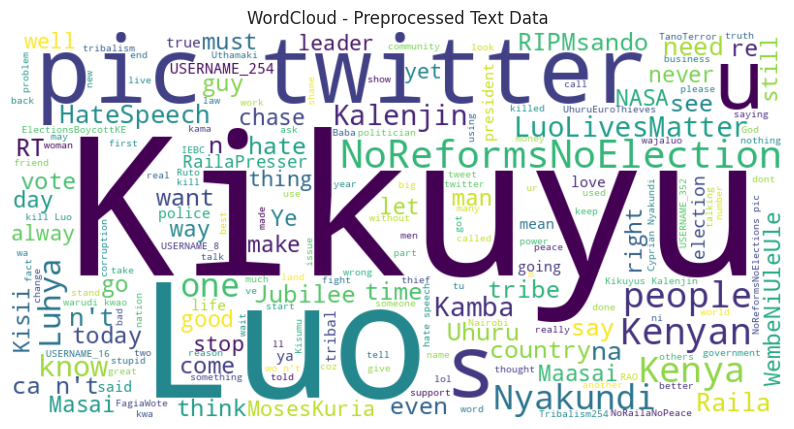

<ipython-input-8-60827f815124>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


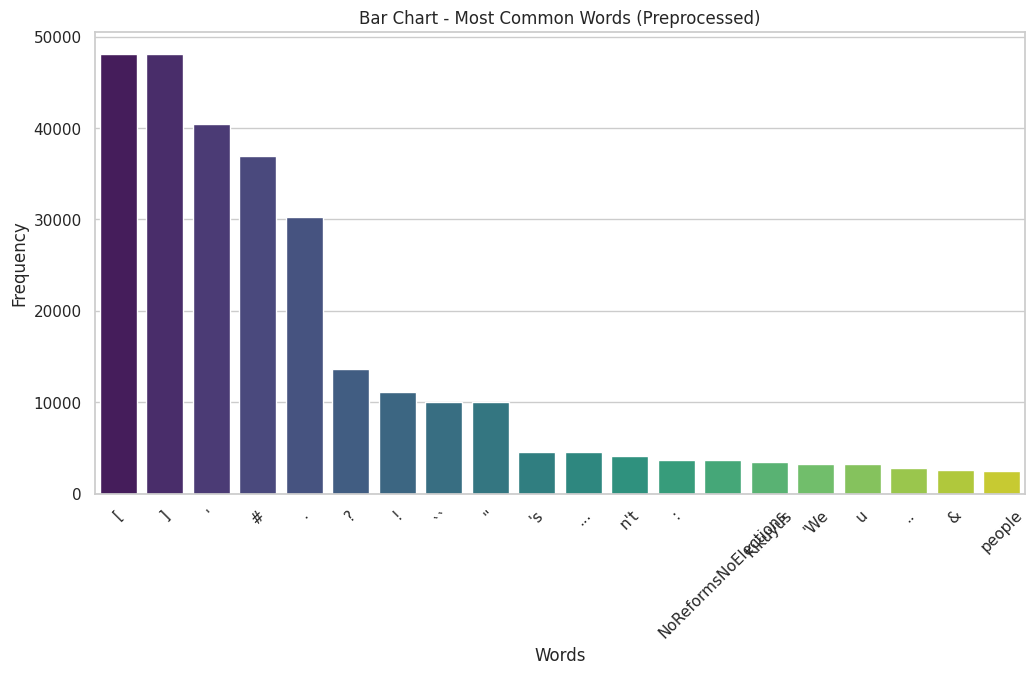

In [8]:
# Combine preprocessed text
processed_text = " ".join([" ".join(tokens) for tokens in dataset['Lemmatized']])

# Generate WordCloud after preprocessing
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Preprocessed Text Data")
plt.show()

# Generate Bar Chart of most common words after preprocessing
word_list = processed_text.split()
word_freq = Counter(word_list)
most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.title("Bar Chart - Most Common Words (Preprocessed)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


Observations:

WordCloud (Original vs. Preprocessed):

The original WordCloud had many irrelevant or common stopwords (e.g., "the," "and," "is"), making it harder to spot meaningful patterns.
After preprocessing, the WordCloud focused on more meaningful words (e.g., specific terms related to hate speech), highlighting key themes and sentiments in the dataset.

Bar Chart (Original vs. Preprocessed):

In the original text, frequently occurring words included a mix of stopwords and repeated non-informative terms.
After preprocessing, the most frequent words shifted to meaningful terms, showing clearer patterns of language usage and thematic relevance.

Effect of Preprocessing:

Tokenization helped isolate individual words for further processing.
Stopword Removal removed common, non-essential words, improving the signal-to-noise ratio.
Stemming simplified words to their root forms, reducing redundancy (e.g., "hates" and "hating" became "hate").
Lemmatization further refined words into linguistically correct base forms, enhancing semantic clarity.
Part-of-Speech Tagging enabled an understanding of the grammatical role of words, helping identify nouns, verbs, etc., commonly used in hate speech contexts.

Visualization Improvements:

Both the WordCloud and bar charts became more concise and relevant, offering insights into the most frequently occurring hate speech-related terms in the dataset.

Summary:

The preprocessing steps significantly improved the quality and interpretability of the textual data. By removing irrelevant words and normalizing the text, the dataset now provides clearer insights into the language patterns and themes related to hate speech. These improvements allow for more accurate analyses in downstream tasks, such as classification or sentiment analysis.

This process highlights the importance of thorough preprocessing in natural language processing tasks, as it enhances data quality and ensures meaningful results.